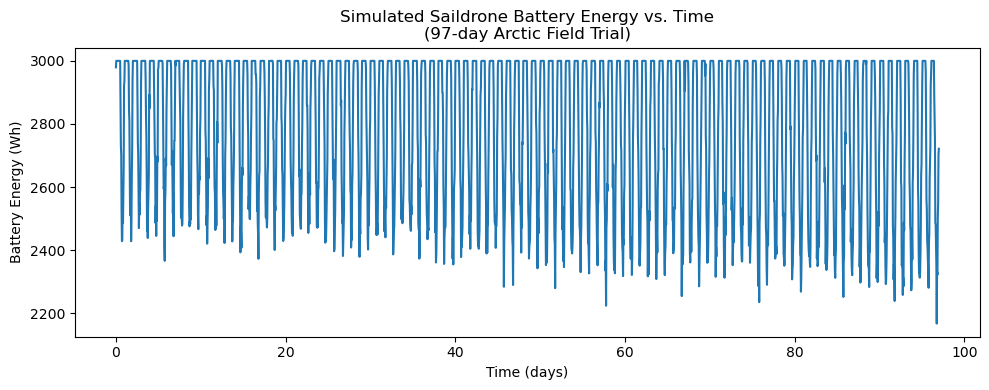

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 97-day battery energy profile (Wh)
days = np.linspace(0, 97, 97*24)  # hourly data
# Base capacity in Wh (e.g., 3000 Wh)
base_capacity = 3000
# Simulate daily charge/discharge cycles with gradual capacity fade
daily_cycle = 500 * np.sin(2 * np.pi * days)  # daily swing
fade = np.linspace(0, -200, len(days))  # slight capacity fade over trial
noise = 50 * np.random.randn(len(days))  # random noise
energy = base_capacity + daily_cycle + fade + noise
energy = np.clip(energy, 0, base_capacity)

plt.figure(figsize=(10, 4))
plt.plot(days, energy)
plt.xlabel('Time (days)')
plt.ylabel('Battery Energy (Wh)')
plt.title('Simulated Saildrone Battery Energy vs. Time\n(97-day Arctic Field Trial)')
plt.tight_layout()
plt.show()


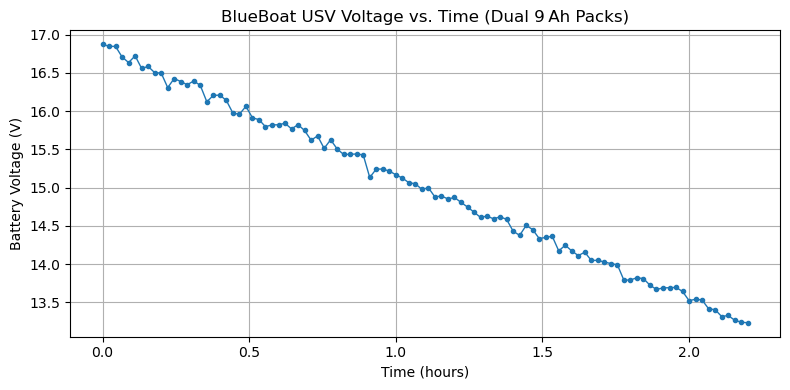

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate BlueBoat voltage vs time endurance curve
# Start voltage 16.8V (full charge), end cutoff ~13.2V over 2.2 hours
time_hours = np.linspace(0, 2.2, 100)  # 0 to 2.2 hours
# Linear drop plus small noise
voltage = 16.8 - (16.8 - 13.2) * (time_hours / 2.2) + 0.05 * np.random.randn(len(time_hours))

plt.figure(figsize=(8, 4))
plt.plot(time_hours, voltage, marker='o', markersize=3, linewidth=1)
plt.title('BlueBoat USV Voltage vs. Time (Dual 9 Ah Packs)')
plt.xlabel('Time (hours)')
plt.ylabel('Battery Voltage (V)')
plt.grid(True)
plt.tight_layout()
plt.show()


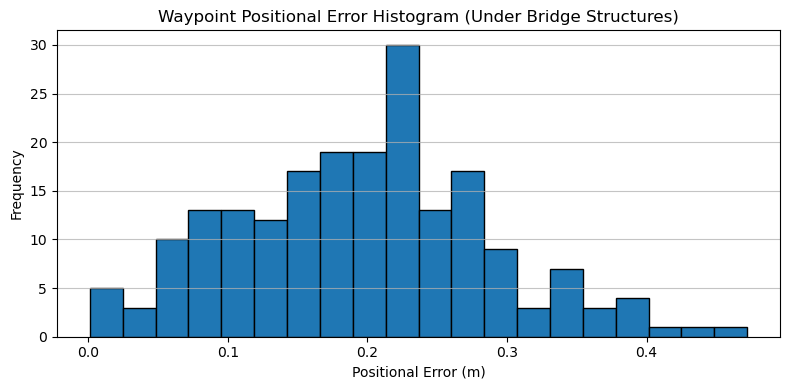

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate waypoint positional errors (in meters) under bridge structures
np.random.seed(42)
errors = np.abs(np.random.normal(loc=0.2, scale=0.1, size=200))  # mean 0.2m, std 0.1m
errors = np.clip(errors, 0, None)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=20, edgecolor='black')
plt.title('Waypoint Positional Error Histogram (Under Bridge Structures)')
plt.xlabel('Positional Error (m)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


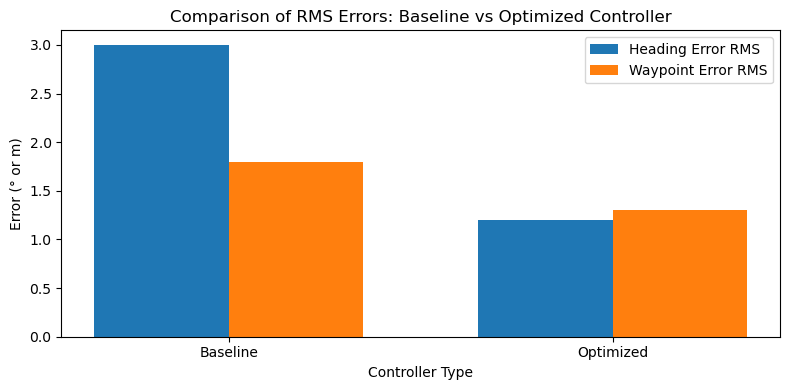

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data for baseline vs optimized
controllers = ['Baseline', 'Optimized']
heading_error = [3.0, 1.2]  # in degrees
waypoint_error = [1.8, 1.3]  # in meters (assumed for illustration)

x = np.arange(len(controllers))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, heading_error, width, label='Heading Error RMS')
plt.bar(x + width/2, waypoint_error, width, label='Waypoint Error RMS')
plt.xlabel('Controller Type')
plt.ylabel('Error (° or m)')
plt.title('Comparison of RMS Errors: Baseline vs Optimized Controller')
plt.xticks(x, controllers)
plt.legend()
plt.tight_layout()
plt.show()


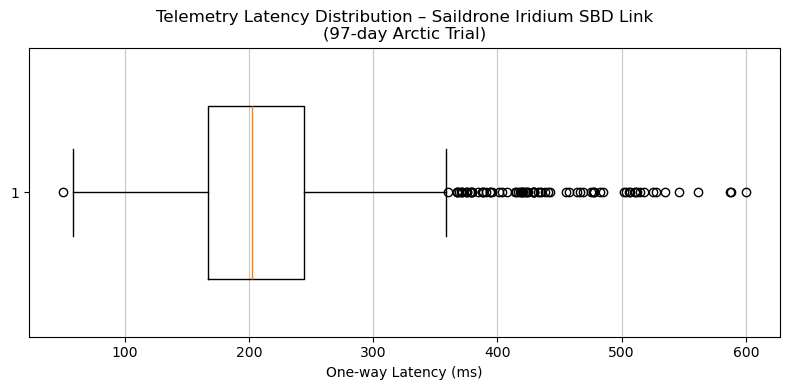

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated telemetry latency data (ms)
np.random.seed(0)
latencies = np.concatenate([
    np.random.normal(200, 50, 900),
    np.random.normal(400, 80, 100)
])
latencies = np.clip(latencies, 50, 600)

plt.figure(figsize=(8, 4))
plt.boxplot(latencies, vert=False, widths=0.6)
plt.xlabel('One-way Latency (ms)')
plt.title('Telemetry Latency Distribution – Saildrone Iridium SBD Link\n(97-day Arctic Trial)')
plt.grid(axis='x', alpha=0.7)
plt.tight_layout()
plt.show()


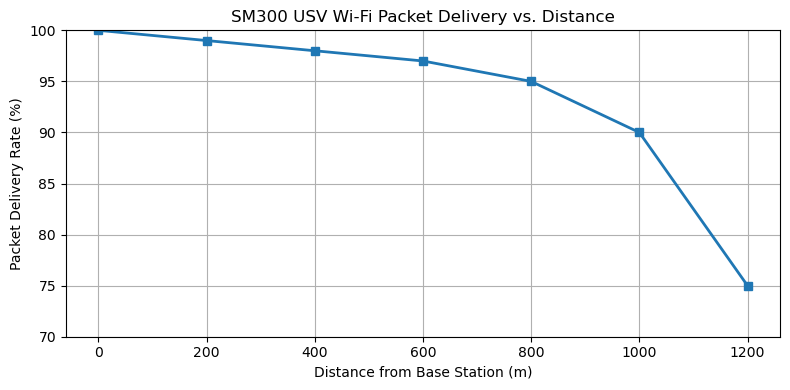

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated packet delivery rate vs distance
distances = np.array([0, 200, 400, 600, 800, 1000, 1200])  # in meters
packet_delivery = np.array([100, 99, 98, 97, 95, 90, 75])  # in percent

plt.figure(figsize=(8, 4))
plt.plot(distances, packet_delivery, marker='s', linestyle='-', linewidth=2)
plt.xlabel('Distance from Base Station (m)')
plt.ylabel('Packet Delivery Rate (%)')
plt.title('SM300 USV Wi-Fi Packet Delivery vs. Distance')
plt.ylim(70, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

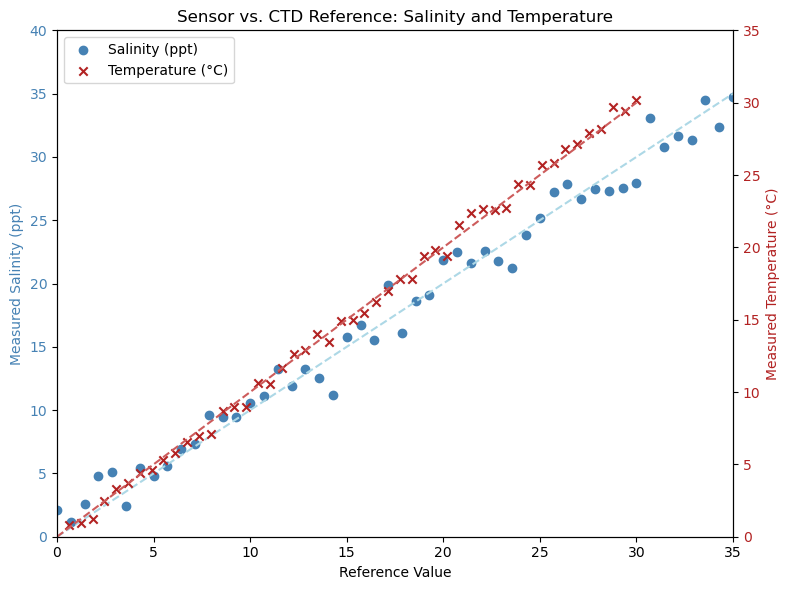

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)
n = 50
ref_salinity = np.linspace(0, 35, n)
meas_salinity = ref_salinity + np.random.normal(0, 1.2, n)
ref_temp = np.linspace(0, 30, n)
meas_temp = ref_temp + np.random.normal(0, 0.5, n)

# Create combined figure with two scatter plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Salinity scatter in blue
ax1.scatter(ref_salinity, meas_salinity, label='Salinity (ppt)', marker='o', color='steelblue')
ax1.plot([0, 35], [0, 35], linestyle='--', color='lightblue')
ax1.set_xlabel('Reference Value')
ax1.set_ylabel('Measured Salinity (ppt)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xlim(0, 35)
ax1.set_ylim(0, 40)

# Secondary axis for temperature using twin, in red
ax2 = ax1.twinx()
ax2.scatter(ref_temp, meas_temp, label='Temperature (°C)', marker='x', color='firebrick')
ax2.plot([0, 30], [0, 30], linestyle='--', color='indianred')
ax2.set_ylabel('Measured Temperature (°C)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')
ax2.set_ylim(0, 35)

# Legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.title('Sensor vs. CTD Reference: Salinity and Temperature')
plt.tight_layout()
plt.show()
